[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/05_Weight_Initialization_Regression.ipynb)

## Weight Initialization Compare by using Regression Cases

### 1. Data Visualliaztion and Preprocessing

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FFS_01433.csv to FFS_01433.csv
User uploaded file "FFS_01433.csv" with length 14378532 bytes


In [0]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, TensorBoard

In [5]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [6]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


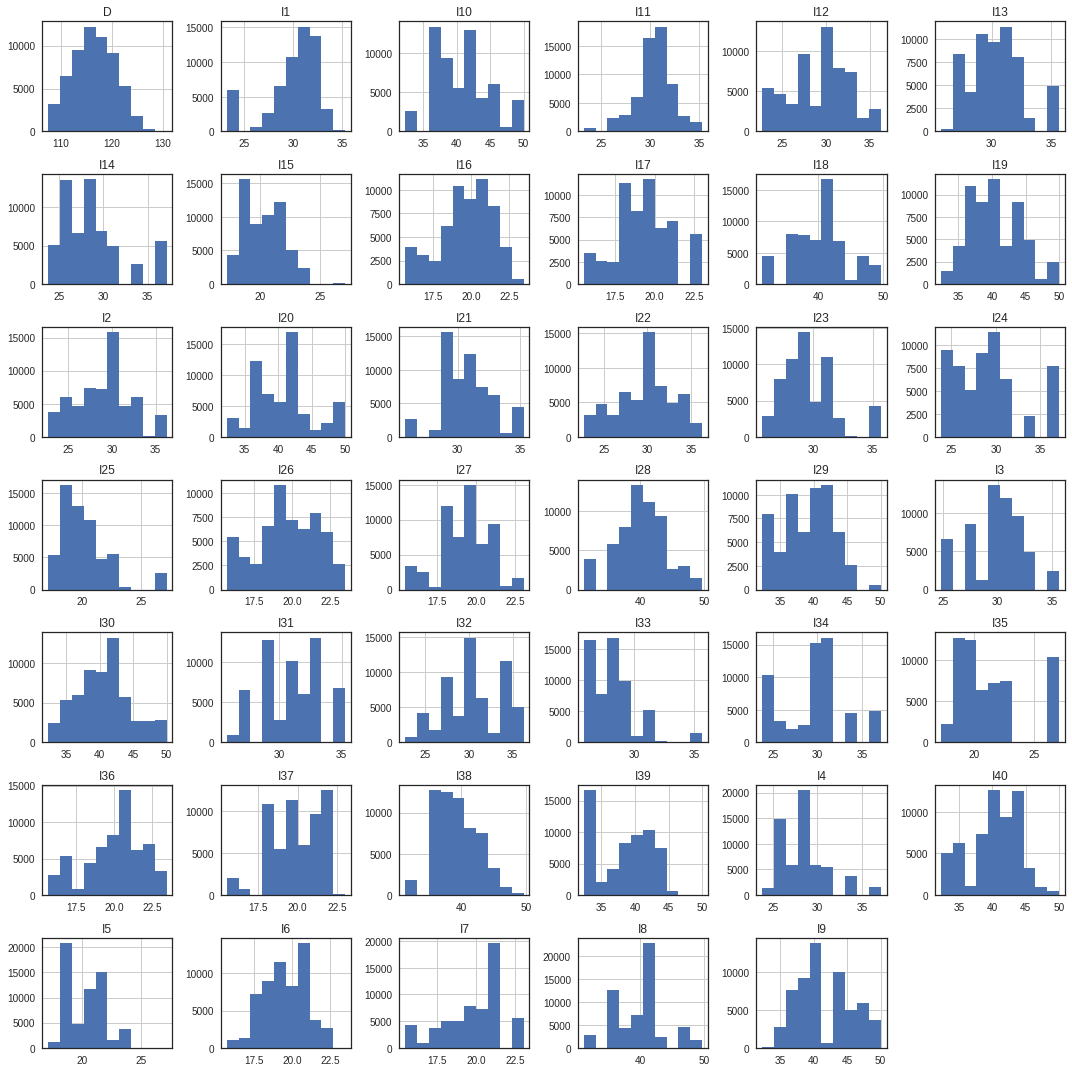

In [7]:
plt.style.use('seaborn-white')
rawdf.hist(figsize=(15,15))
plt.tight_layout()

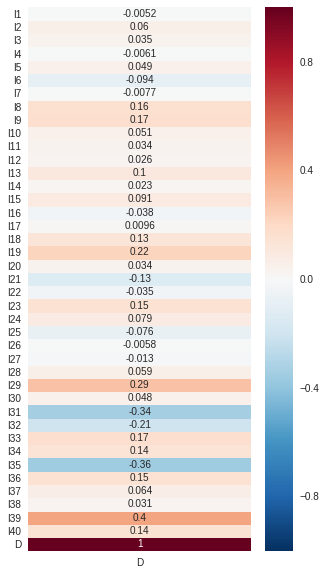

In [8]:
plt.figure(figsize=(5,10))
sns.heatmap(rawdf.corr()[['D']], annot=True, vmin=-1,vmax=1,)

In [0]:
df = rawdf.copy()

#feature scale
ss = StandardScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [10]:
df.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,1.19,2.22,-0.86,-1.31,-0.63,-0.94,1.28,0.27,-0.25,0.19,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
1,-0.82,0.71,0.31,-1.19,0.39,1.83,0.38,-2.15,-1.77,-1.71,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
2,-0.82,0.71,0.31,-1.19,0.39,1.83,0.38,-2.15,-1.77,-1.71,...,-0.13,0.36,-1.04,-1.01,-1.05,0.86,0.27,0.72,-1.28,-2.21
3,0.82,-0.21,-1.95,-0.26,0.07,-1.42,0.74,0.33,-0.33,-0.57,...,-1.37,-0.68,-0.77,-0.60,-1.00,0.71,-2.20,-0.29,-0.13,-2.21
4,0.82,-0.21,-1.95,-0.26,0.07,-1.42,0.74,0.33,-0.33,-0.57,...,-0.03,0.66,2.12,-0.82,1.70,-0.04,1.44,-1.63,1.47,-2.21


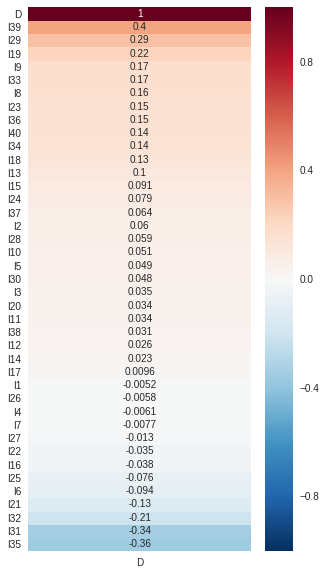

In [13]:
plt.figure(figsize=(5,10))
tempdf = df.corr()[['D']].sort_values('D',ascending=False)
sns.heatmap(tempdf, annot=True, vmin=-1,vmax=1,)

In [15]:
X = df.drop(['D'],axis=1).values
y = (df['D'].values).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


### 2. Building a Deep Neural Network Using ReLU as activation function

#### plot the loss

In [0]:
def plot_loss(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])

### 2.1 Initialze with ReLU and value of Zeros

In [0]:
model_1 = Sequential()
model_1.add(Dense(64, input_shape=(X.shape[1],), activation='relu',kernel_initializer='zeros'))
model_1.add(Dense(32, activation='relu', kernel_initializer='zeros'))
model_1.add(Dense(16, activation='relu', kernel_initializer='zeros'))
model_1.add(Dense(8, activation='relu',kernel_initializer='zeros'))
model_1.add(Dense(1))

In [17]:
model_1.compile('adam','mse')
model_1_history = model_1.fit(X_train, y_train, epochs=100, verbose=1, validation_split=0.2)

Train on 37699 samples, validate on 9425 samples
Epoch 1/100
37699/37699 [==============================] - 10s 269us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 2/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 3/100
24928/37699 [==================>...........] - ETA: 2s - loss: 0.9870

37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 4/100
37699/37699 [==============================] - 9s 249us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 5/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 6/100
10144/37699 [=======>......................] - ETA: 6s - loss: 1.0014

37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0102
Epoch 7/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 8/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 9/100
 8192/37699 [=====>........................] - ETA: 6s - loss: 0.9939

37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 10/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 11/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9911 - val_loss: 1.0102
Epoch 12/100
 7104/37699 [====>.........................] - ETA: 7s - loss: 0.9890

37699/37699 [==============================] - 9s 248us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 13/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 14/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 15/100
 7392/37699 [====>.........................] - ETA: 6s - loss: 0.9868

37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0102
Epoch 16/100
37699/37699 [==============================] - 9s 244us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 17/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 18/100
 7456/37699 [====>.........................] - ETA: 6s - loss: 1.0082

37699/37699 [==============================] - 9s 244us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 19/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9911 - val_loss: 1.0101
Epoch 20/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0101
Epoch 21/100
 7136/37699 [====>.........................] - ETA: 7s - loss: 1.0241

37699/37699 [==============================] - 9s 249us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 22/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 23/100
37699/37699 [==============================] - 9s 250us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 24/100
 6592/37699 [====>.........................] - ETA: 7s - loss: 0.9924

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 25/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 26/100
37699/37699 [==============================] - 9s 250us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 27/100
 6464/37699 [====>.........................] - ETA: 7s - loss: 0.9859

37699/37699 [==============================] - 9s 249us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 28/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 29/100
37699/37699 [==============================] - 9s 249us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 30/100
 6688/37699 [====>.........................] - ETA: 7s - loss: 0.9809

37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 31/100
37699/37699 [==============================] - 9s 249us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 32/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 33/100
 6752/37699 [====>.........................] - ETA: 7s - loss: 1.0031

37699/37699 [==============================] - 9s 249us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 34/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 35/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 36/100
 7168/37699 [====>.........................] - ETA: 7s - loss: 0.9724

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 37/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 38/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 39/100
 6848/37699 [====>.........................] - ETA: 7s - loss: 0.9736

37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 40/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 41/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 42/100
 7040/37699 [====>.........................] - ETA: 7s - loss: 0.9851

37699/37699 [==============================] - 9s 249us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 43/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 44/100
37699/37699 [==============================] - 9s 244us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 45/100
 7232/37699 [====>.........................] - ETA: 7s - loss: 1.0006

37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 46/100
37699/37699 [==============================] - 9s 250us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 47/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 48/100
 6656/37699 [====>.........................] - ETA: 7s - loss: 0.9928

37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 49/100
37699/37699 [==============================] - 9s 249us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 50/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 51/100
 6816/37699 [====>.........................] - ETA: 7s - loss: 0.9877

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 52/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 53/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 54/100
 6720/37699 [====>.........................] - ETA: 7s - loss: 1.0097

37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0102
Epoch 55/100
37699/37699 [==============================] - 9s 244us/step - loss: 0.9912 - val_loss: 1.0101
Epoch 56/100
37699/37699 [==============================] - 9s 241us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 57/100
 8544/37699 [=====>........................] - ETA: 6s - loss: 1.0069

37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0103
Epoch 58/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 59/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 60/100
 7360/37699 [====>.........................] - ETA: 7s - loss: 0.9852

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 61/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0102
Epoch 62/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 63/100
 6976/37699 [====>.........................] - ETA: 7s - loss: 1.0065

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 64/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 65/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 66/100
 7008/37699 [====>.........................] - ETA: 7s - loss: 0.9889

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0101
Epoch 67/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 68/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 69/100
 7264/37699 [====>.........................] - ETA: 7s - loss: 0.9749

37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 70/100
37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 71/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 72/100
 7104/37699 [====>.........................] - ETA: 7s - loss: 1.0010

37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 73/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 74/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0101
Epoch 75/100
 7392/37699 [====>.........................] - ETA: 7s - loss: 1.0088

37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 76/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 77/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 78/100
 7200/37699 [====>.........................] - ETA: 7s - loss: 0.9853

37699/37699 [==============================] - 9s 248us/step - loss: 0.9912 - val_loss: 1.0102
Epoch 79/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 80/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 81/100
 7136/37699 [====>.........................] - ETA: 7s - loss: 1.0245

37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 82/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 83/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 84/100
 7264/37699 [====>.........................] - ETA: 7s - loss: 0.9969

37699/37699 [==============================] - 9s 249us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 85/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 86/100
37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 87/100
 6784/37699 [====>.........................] - ETA: 7s - loss: 0.9945

37699/37699 [==============================] - 9s 249us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 88/100
37699/37699 [==============================] - 9s 250us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 89/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 90/100
 6752/37699 [====>.........................] - ETA: 7s - loss: 1.0151

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0102
Epoch 91/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 92/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0100
Epoch 93/100
 7552/37699 [=====>........................] - ETA: 6s - loss: 1.0031

37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 94/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 95/100
37699/37699 [==============================] - 9s 244us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 96/100
 7712/37699 [=====>........................] - ETA: 7s - loss: 0.9893

37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0099
Epoch 97/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0101
Epoch 98/100
37699/37699 [==============================] - 9s 246us/step - loss: 0.9913 - val_loss: 1.0100
Epoch 99/100
 7616/37699 [=====>........................] - ETA: 7s - loss: 0.9686

37699/37699 [==============================] - 9s 247us/step - loss: 0.9912 - val_loss: 1.0099
Epoch 100/100
37699/37699 [==============================] - 9s 245us/step - loss: 0.9912 - val_loss: 1.0099


### 2.2 Initialize with ReLU and RandomNormal mean=0.0, stddev=0.4

In [0]:
init = initializers.RandomNormal(mean=0.0, stddev=0.4)
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X.shape[1],), activation='relu',kernel_initializer=init))
model_2.add(Dense(32, activation='relu', kernel_initializer= init))
model_2.add(Dense(16, activation='relu', kernel_initializer=init))
model_2.add(Dense(8, activation='relu',kernel_initializer=init))
model_2.add(Dense(1))

In [28]:
model_2.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_2_history = model_2.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 253us/step - loss: 1.5079 - val_loss: 0.6732
Epoch 2/50
37699/37699 [==============================] - 10s 252us/step - loss: 0.5817 - val_loss: 0.5273
Epoch 3/50
24480/37699 [==================>...........] - ETA: 3s - loss: 0.4929

37699/37699 [==============================] - 9s 250us/step - loss: 0.4830 - val_loss: 0.4725
Epoch 4/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.4314 - val_loss: 0.4223
Epoch 5/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.3948 - val_loss: 0.4026
Epoch 6/50
10144/37699 [=======>......................] - ETA: 6s - loss: 0.3790

37699/37699 [==============================] - 9s 248us/step - loss: 0.3694 - val_loss: 0.3787
Epoch 7/50
37699/37699 [==============================] - 9s 250us/step - loss: 0.3480 - val_loss: 0.3605
Epoch 8/50
37699/37699 [==============================] - 10s 252us/step - loss: 0.3328 - val_loss: 0.3493
Epoch 9/50
 6816/37699 [====>.........................] - ETA: 7s - loss: 0.3239

37699/37699 [==============================] - 9s 251us/step - loss: 0.3207 - val_loss: 0.3352
Epoch 10/50
37699/37699 [==============================] - 9s 249us/step - loss: 0.3089 - val_loss: 0.3293
Epoch 11/50
37699/37699 [==============================] - 9s 249us/step - loss: 0.3006 - val_loss: 0.3258
Epoch 12/50
 6944/37699 [====>.........................] - ETA: 7s - loss: 0.2863

37699/37699 [==============================] - 9s 249us/step - loss: 0.2917 - val_loss: 0.3274
Epoch 13/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2859 - val_loss: 0.3350
Epoch 14/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2799 - val_loss: 0.3099
Epoch 15/50
 6304/37699 [====>.........................] - ETA: 7s - loss: 0.2657

37699/37699 [==============================] - 10s 252us/step - loss: 0.2745 - val_loss: 0.3205
Epoch 16/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2703 - val_loss: 0.3078
Epoch 17/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2653 - val_loss: 0.3377
Epoch 18/50
 5984/37699 [===>..........................] - ETA: 7s - loss: 0.2534

37699/37699 [==============================] - 9s 251us/step - loss: 0.2618 - val_loss: 0.3004
Epoch 19/50
37699/37699 [==============================] - 9s 250us/step - loss: 0.2587 - val_loss: 0.3067
Epoch 20/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2549 - val_loss: 0.3056
Epoch 21/50
 6304/37699 [====>.........................] - ETA: 7s - loss: 0.2413

37699/37699 [==============================] - 9s 250us/step - loss: 0.2521 - val_loss: 0.2968
Epoch 22/50
37699/37699 [==============================] - 9s 250us/step - loss: 0.2495 - val_loss: 0.2982
Epoch 23/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2461 - val_loss: 0.2924
Epoch 24/50
 6496/37699 [====>.........................] - ETA: 7s - loss: 0.2450

37699/37699 [==============================] - 9s 250us/step - loss: 0.2446 - val_loss: 0.2921
Epoch 25/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2418 - val_loss: 0.2892
Epoch 26/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2395 - val_loss: 0.2936
Epoch 27/50
 6368/37699 [====>.........................] - ETA: 7s - loss: 0.2324

37699/37699 [==============================] - 9s 251us/step - loss: 0.2380 - val_loss: 0.2899
Epoch 28/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2349 - val_loss: 0.2875
Epoch 29/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2342 - val_loss: 0.2897
Epoch 30/50
 6304/37699 [====>.........................] - ETA: 7s - loss: 0.2307

37699/37699 [==============================] - 9s 251us/step - loss: 0.2325 - val_loss: 0.2905
Epoch 31/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2314 - val_loss: 0.3010
Epoch 00031: early stopping


### 2.3 Initialize with ReLU and RandomNormal mean=0.0, stddev=0.1



In [0]:
init = initializers.RandomNormal(mean=0.0, stddev=0.1)
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(X.shape[1],), activation='relu',kernel_initializer=init))
model_3.add(Dense(32, activation='relu', kernel_initializer= init))
model_3.add(Dense(16, activation='relu', kernel_initializer=init))
model_3.add(Dense(8, activation='relu',kernel_initializer=init))
model_3.add(Dense(1))

In [36]:
model_3.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_3_history = model_3.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.4316 - val_loss: 0.3606
Epoch 2/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.3377 - val_loss: 0.3352
Epoch 3/50
23648/37699 [=================>............] - ETA: 3s - loss: 0.3117

37699/37699 [==============================] - 10s 256us/step - loss: 0.3112 - val_loss: 0.3118
Epoch 4/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2923 - val_loss: 0.3043
Epoch 5/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2785 - val_loss: 0.2859
Epoch 6/50
 9216/37699 [======>.......................] - ETA: 6s - loss: 0.2694

37699/37699 [==============================] - 10s 254us/step - loss: 0.2678 - val_loss: 0.2841
Epoch 7/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2592 - val_loss: 0.2795
Epoch 8/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2514 - val_loss: 0.2753
Epoch 9/50
 6656/37699 [====>.........................] - ETA: 7s - loss: 0.2328

37699/37699 [==============================] - 10s 255us/step - loss: 0.2461 - val_loss: 0.2682
Epoch 10/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2408 - val_loss: 0.2681
Epoch 11/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2346 - val_loss: 0.2659
Epoch 12/50
 5600/37699 [===>..........................] - ETA: 7s - loss: 0.2301

37699/37699 [==============================] - 10s 252us/step - loss: 0.2310 - val_loss: 0.2826
Epoch 13/50
37699/37699 [==============================] - 10s 252us/step - loss: 0.2281 - val_loss: 0.2617
Epoch 14/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2229 - val_loss: 0.2675
Epoch 15/50
 5216/37699 [===>..........................] - ETA: 7s - loss: 0.2229

37699/37699 [==============================] - 10s 256us/step - loss: 0.2199 - val_loss: 0.2517
Epoch 16/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2166 - val_loss: 0.2541
Epoch 17/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2158 - val_loss: 0.2541
Epoch 18/50
 5568/37699 [===>..........................] - ETA: 7s - loss: 0.2021

37699/37699 [==============================] - 10s 253us/step - loss: 0.2121 - val_loss: 0.2542
Epoch 00018: early stopping


### 2.4 Initialize with ReLU and Xavier Initialization

In [0]:
init = initializers.glorot_normal()
model_4 = Sequential()
model_4.add(Dense(64, input_shape=(X.shape[1],), activation='relu',kernel_initializer=init))
model_4.add(Dense(32, activation='relu', kernel_initializer= init))
model_4.add(Dense(16, activation='relu', kernel_initializer=init))
model_4.add(Dense(8, activation='relu',kernel_initializer=init))
model_4.add(Dense(1))

In [39]:
model_4.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_4_history = model_4.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.4431 - val_loss: 0.3601
Epoch 2/50
37699/37699 [==============================] - 10s 252us/step - loss: 0.3378 - val_loss: 0.3284
Epoch 3/50
24160/37699 [==================>...........] - ETA: 3s - loss: 0.3084

37699/37699 [==============================] - 10s 254us/step - loss: 0.3071 - val_loss: 0.3056
Epoch 4/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2877 - val_loss: 0.2976
Epoch 5/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2729 - val_loss: 0.2826
Epoch 6/50
 9024/37699 [======>.......................] - ETA: 6s - loss: 0.2568

37699/37699 [==============================] - 10s 256us/step - loss: 0.2605 - val_loss: 0.2804
Epoch 7/50
37699/37699 [==============================] - 10s 252us/step - loss: 0.2520 - val_loss: 0.2837
Epoch 8/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2437 - val_loss: 0.2735
Epoch 9/50
 6176/37699 [===>..........................] - ETA: 7s - loss: 0.2367

37699/37699 [==============================] - 10s 254us/step - loss: 0.2382 - val_loss: 0.2696
Epoch 10/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2341 - val_loss: 0.2647
Epoch 11/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2286 - val_loss: 0.2627
Epoch 12/50
 5344/37699 [===>..........................] - ETA: 7s - loss: 0.2147

37699/37699 [==============================] - 9s 252us/step - loss: 0.2251 - val_loss: 0.2617
Epoch 13/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2217 - val_loss: 0.2632
Epoch 14/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2186 - val_loss: 0.2593
Epoch 15/50
 5312/37699 [===>..........................] - ETA: 7s - loss: 0.2092

37699/37699 [==============================] - 10s 252us/step - loss: 0.2166 - val_loss: 0.2593
Epoch 16/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2142 - val_loss: 0.2558
Epoch 17/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2115 - val_loss: 0.2582
Epoch 18/50
 5728/37699 [===>..........................] - ETA: 7s - loss: 0.2116

37699/37699 [==============================] - 10s 253us/step - loss: 0.2098 - val_loss: 0.2584
Epoch 19/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2080 - val_loss: 0.2569
Epoch 00019: early stopping


### 2.5 Initialize with ReLU He_normal

In [0]:
init = initializers.he_normal()
model_5 = Sequential()
model_5.add(Dense(64, input_shape=(X.shape[1],), activation='relu',kernel_initializer=init))
model_5.add(Dense(32, activation='relu', kernel_initializer= init))
model_5.add(Dense(16, activation='relu', kernel_initializer=init))
model_5.add(Dense(8, activation='relu',kernel_initializer=init))
model_5.add(Dense(1))

In [42]:
model_5.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_5_history = model_5.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 259us/step - loss: 0.4781 - val_loss: 0.3938
Epoch 2/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.3591 - val_loss: 0.3539
Epoch 3/50
24512/37699 [==================>...........] - ETA: 3s - loss: 0.3278

37699/37699 [==============================] - 9s 249us/step - loss: 0.3246 - val_loss: 0.3315
Epoch 4/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.3056 - val_loss: 0.3218
Epoch 5/50
37699/37699 [==============================] - 9s 250us/step - loss: 0.2907 - val_loss: 0.3104
Epoch 6/50
10080/37699 [=======>......................] - ETA: 6s - loss: 0.2749

37699/37699 [==============================] - 9s 249us/step - loss: 0.2802 - val_loss: 0.3040
Epoch 7/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2694 - val_loss: 0.2991
Epoch 8/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2626 - val_loss: 0.2951
Epoch 9/50
 7744/37699 [=====>........................] - ETA: 7s - loss: 0.2493

37699/37699 [==============================] - 9s 251us/step - loss: 0.2546 - val_loss: 0.2883
Epoch 10/50
37699/37699 [==============================] - 9s 252us/step - loss: 0.2484 - val_loss: 0.2910
Epoch 11/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2432 - val_loss: 0.2835
Epoch 12/50
 6528/37699 [====>.........................] - ETA: 7s - loss: 0.2377

37699/37699 [==============================] - 9s 251us/step - loss: 0.2380 - val_loss: 0.2755
Epoch 13/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2352 - val_loss: 0.2784
Epoch 14/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2308 - val_loss: 0.2748
Epoch 15/50
 6496/37699 [====>.........................] - ETA: 7s - loss: 0.2114

37699/37699 [==============================] - 9s 250us/step - loss: 0.2269 - val_loss: 0.2764
Epoch 16/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2245 - val_loss: 0.2722
Epoch 17/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.2218 - val_loss: 0.2751
Epoch 18/50
 6240/37699 [===>..........................] - ETA: 7s - loss: 0.2098

37699/37699 [==============================] - 9s 252us/step - loss: 0.2194 - val_loss: 0.2743
Epoch 19/50
37699/37699 [==============================] - 9s 250us/step - loss: 0.2179 - val_loss: 0.2697
Epoch 20/50
37699/37699 [==============================] - 9s 249us/step - loss: 0.2144 - val_loss: 0.2679
Epoch 21/50
 7168/37699 [====>.........................] - ETA: 7s - loss: 0.2059

37699/37699 [==============================] - 9s 248us/step - loss: 0.2126 - val_loss: 0.2716
Epoch 22/50
37699/37699 [==============================] - 9s 248us/step - loss: 0.2105 - val_loss: 0.2705
Epoch 23/50
37699/37699 [==============================] - 9s 246us/step - loss: 0.2104 - val_loss: 0.2679
Epoch 00023: early stopping


### 2.6 Initialize with ReLU He_Uniform

In [0]:
init = initializers.he_uniform()
model_6 = Sequential()
model_6.add(Dense(64, input_shape=(X.shape[1],), activation='relu',kernel_initializer=init))
model_6.add(Dense(32, activation='relu', kernel_initializer= init))
model_6.add(Dense(16, activation='relu', kernel_initializer=init))
model_6.add(Dense(8, activation='relu',kernel_initializer=init))
model_6.add(Dense(1))

In [45]:
model_6.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_6_history = model_6.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 265us/step - loss: 0.6350 - val_loss: 0.4351
Epoch 2/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.3927 - val_loss: 0.3754
Epoch 3/50
24288/37699 [==================>...........] - ETA: 3s - loss: 0.3550

37699/37699 [==============================] - 9s 250us/step - loss: 0.3500 - val_loss: 0.3511
Epoch 4/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.3271 - val_loss: 0.3297
Epoch 5/50
37699/37699 [==============================] - 9s 249us/step - loss: 0.3087 - val_loss: 0.3314
Epoch 6/50
10304/37699 [=======>......................] - ETA: 6s - loss: 0.2942

37699/37699 [==============================] - 9s 250us/step - loss: 0.2950 - val_loss: 0.3133
Epoch 7/50
37699/37699 [==============================] - 9s 247us/step - loss: 0.2824 - val_loss: 0.3045
Epoch 8/50
37699/37699 [==============================] - 9s 246us/step - loss: 0.2728 - val_loss: 0.2920
Epoch 9/50
 8864/37699 [======>.......................] - ETA: 6s - loss: 0.2612

37699/37699 [==============================] - 9s 249us/step - loss: 0.2671 - val_loss: 0.2989
Epoch 10/50
37699/37699 [==============================] - 9s 248us/step - loss: 0.2597 - val_loss: 0.3018
Epoch 11/50
37699/37699 [==============================] - 9s 246us/step - loss: 0.2537 - val_loss: 0.2896
Epoch 12/50
 8320/37699 [=====>........................] - ETA: 6s - loss: 0.2489

37699/37699 [==============================] - 9s 246us/step - loss: 0.2487 - val_loss: 0.2795
Epoch 13/50
37699/37699 [==============================] - 9s 247us/step - loss: 0.2447 - val_loss: 0.2822
Epoch 14/50
37699/37699 [==============================] - 9s 245us/step - loss: 0.2396 - val_loss: 0.2866
Epoch 15/50
 8672/37699 [=====>........................] - ETA: 6s - loss: 0.2348

37699/37699 [==============================] - 9s 246us/step - loss: 0.2362 - val_loss: 0.2771
Epoch 16/50
37699/37699 [==============================] - 9s 243us/step - loss: 0.2317 - val_loss: 0.2778
Epoch 17/50
37699/37699 [==============================] - 9s 244us/step - loss: 0.2299 - val_loss: 0.2790
Epoch 18/50
 9056/37699 [======>.......................] - ETA: 6s - loss: 0.2247

37699/37699 [==============================] - 9s 244us/step - loss: 0.2264 - val_loss: 0.2741
Epoch 19/50
37699/37699 [==============================] - 9s 246us/step - loss: 0.2238 - val_loss: 0.2724
Epoch 20/50
37699/37699 [==============================] - 9s 247us/step - loss: 0.2218 - val_loss: 0.2745
Epoch 21/50
 8384/37699 [=====>........................] - ETA: 6s - loss: 0.2156

37699/37699 [==============================] - 9s 246us/step - loss: 0.2194 - val_loss: 0.2784
Epoch 22/50
37699/37699 [==============================] - 9s 246us/step - loss: 0.2174 - val_loss: 0.2755
Epoch 00022: early stopping


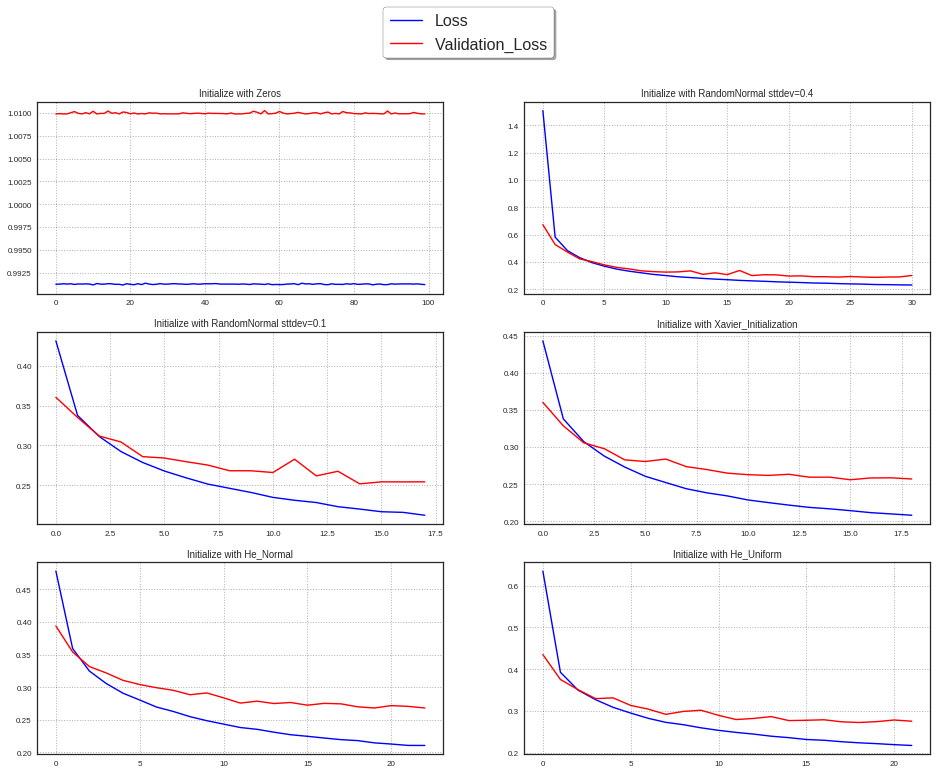

In [116]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(16,12))
ax1.plot(model_1_history.history['loss'],color='b')
ax1.plot(model_1_history.history['val_loss'],color='r')
ax1.set_title('Initialize with Zeros')
ax1.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax2.plot(model_2_history.history['loss'],color='b')
ax2.plot(model_2_history.history['val_loss'],color='r')
ax2.set_title('Initialize with RandomNormal sttdev=0.4')
ax2.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax3.plot(model_3_history.history['loss'],color='b')
ax3.plot(model_3_history.history['val_loss'],color='r')
ax3.set_title('Initialize with RandomNormal sttdev=0.1')
ax3.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax4.plot(model_4_history.history['loss'],color='b')
ax4.plot(model_4_history.history['val_loss'],color='r')
ax4.set_title('Initialize with Xavier_Initialization')
ax4.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax5.plot(model_5_history.history['loss'],color='b')
ax5.plot(model_5_history.history['val_loss'],color='r')
ax5.set_title('Initialize with He_Normal')
ax5.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax6.plot(model_6_history.history['loss'],color='b',label='Loss')
ax6.plot(model_6_history.history['val_loss'],color='r',label='Validation_Loss')
ax6.set_title('Initialize with He_Uniform')
ax6.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

handles, labels = ax6.get_legend_handles_labels()
fig.legend(handles, labels,loc='upper center',ncol=1,fontsize=16,frameon=True,edgecolor='black',shadow=True)

## 3. Building a Deep Neural Network using Tanh as activation function

### 3.1 Initialze with Tanh and RandomUniform

In [0]:
init2 = initializers.RandomUniform()
model_1 = Sequential()
model_1.add(Dense(64, input_shape=(X.shape[1],), activation='tanh',kernel_initializer=init2))
model_1.add(Dense(32, activation='tanh', kernel_initializer= init2))
model_1.add(Dense(16, activation='tanh', kernel_initializer=init2))
model_1.add(Dense(8, activation='tanh',kernel_initializer=init2))
model_1.add(Dense(1))

In [120]:
model_1.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_1_history = model_1.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 264us/step - loss: 0.5129 - val_loss: 0.5029
Epoch 2/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.4903 - val_loss: 0.4872
Epoch 3/50
23200/37699 [=================>............] - ETA: 3s - loss: 0.4612

37699/37699 [==============================] - 10s 258us/step - loss: 0.4507 - val_loss: 0.4085
Epoch 4/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.3933 - val_loss: 0.3751
Epoch 5/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.3691 - val_loss: 0.3599
Epoch 6/50
 8768/37699 [=====>........................] - ETA: 6s - loss: 0.3563

37699/37699 [==============================] - 10s 253us/step - loss: 0.3517 - val_loss: 0.3694
Epoch 7/50
37699/37699 [==============================] - 9s 251us/step - loss: 0.3401 - val_loss: 0.3333
Epoch 8/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.3293 - val_loss: 0.3309
Epoch 9/50
 7040/37699 [====>.........................] - ETA: 7s - loss: 0.3273

37699/37699 [==============================] - 10s 258us/step - loss: 0.3206 - val_loss: 0.3206
Epoch 10/50
37699/37699 [==============================] - 10s 257us/step - loss: 0.3122 - val_loss: 0.3160
Epoch 11/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.3040 - val_loss: 0.3107
Epoch 12/50
 5504/37699 [===>..........................] - ETA: 7s - loss: 0.2858

37699/37699 [==============================] - 10s 254us/step - loss: 0.2967 - val_loss: 0.3152
Epoch 13/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2899 - val_loss: 0.3046
Epoch 14/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2851 - val_loss: 0.2960
Epoch 15/50
 5632/37699 [===>..........................] - ETA: 7s - loss: 0.2829

37699/37699 [==============================] - 10s 256us/step - loss: 0.2784 - val_loss: 0.2960
Epoch 16/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2731 - val_loss: 0.2925
Epoch 17/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2691 - val_loss: 0.2891
Epoch 18/50
 5536/37699 [===>..........................] - ETA: 7s - loss: 0.2675

37699/37699 [==============================] - 10s 255us/step - loss: 0.2640 - val_loss: 0.2858
Epoch 19/50
37699/37699 [==============================] - 10s 257us/step - loss: 0.2599 - val_loss: 0.2892
Epoch 20/50
37699/37699 [==============================] - 10s 255us/step - loss: 0.2552 - val_loss: 0.2818
Epoch 21/50
 5088/37699 [===>..........................] - ETA: 7s - loss: 0.2482

37699/37699 [==============================] - 10s 257us/step - loss: 0.2510 - val_loss: 0.2750
Epoch 22/50
37699/37699 [==============================] - 10s 253us/step - loss: 0.2476 - val_loss: 0.2788
Epoch 23/50
37699/37699 [==============================] - 10s 257us/step - loss: 0.2431 - val_loss: 0.2768
Epoch 24/50
 4864/37699 [==>...........................] - ETA: 7s - loss: 0.2372

37699/37699 [==============================] - 10s 257us/step - loss: 0.2410 - val_loss: 0.2762
Epoch 00024: early stopping


 ### 3.2 Initialize with Tanh and RandomNormal mean=0.0, stddev=0.05

In [0]:
init2 = initializers.RandomNormal(mean=0.0, stddev=0.05)
model_2 = Sequential()
model_2.add(Dense(64, input_shape=(X.shape[1],), activation='tanh',kernel_initializer=init2))
model_2.add(Dense(32, activation='tanh', kernel_initializer= init2))
model_2.add(Dense(16, activation='tanh', kernel_initializer=init2))
model_2.add(Dense(8, activation='tanh',kernel_initializer=init2))
model_2.add(Dense(1))

In [122]:
model_2.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_2_history = model_2.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 269us/step - loss: 0.5087 - val_loss: 0.4895
Epoch 2/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.4572 - val_loss: 0.4222
Epoch 3/50
23136/37699 [=================>............] - ETA: 3s - loss: 0.3951

37699/37699 [==============================] - 10s 257us/step - loss: 0.3824 - val_loss: 0.3539
Epoch 4/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.3418 - val_loss: 0.3398
Epoch 5/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.3202 - val_loss: 0.3182
Epoch 6/50
 8288/37699 [=====>........................] - ETA: 7s - loss: 0.3071

37699/37699 [==============================] - 10s 258us/step - loss: 0.3065 - val_loss: 0.3043
Epoch 7/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2942 - val_loss: 0.2967
Epoch 8/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2855 - val_loss: 0.2932
Epoch 9/50
 6016/37699 [===>..........................] - ETA: 7s - loss: 0.2795

37699/37699 [==============================] - 10s 259us/step - loss: 0.2776 - val_loss: 0.2887
Epoch 10/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2713 - val_loss: 0.2850
Epoch 11/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.2648 - val_loss: 0.2804
Epoch 12/50
 4864/37699 [==>...........................] - ETA: 8s - loss: 0.2548

37699/37699 [==============================] - 10s 259us/step - loss: 0.2586 - val_loss: 0.2757
Epoch 13/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2540 - val_loss: 0.2807
Epoch 14/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.2491 - val_loss: 0.2686
Epoch 15/50
 4576/37699 [==>...........................] - ETA: 8s - loss: 0.2401

37699/37699 [==============================] - 10s 258us/step - loss: 0.2443 - val_loss: 0.2757
Epoch 16/50
37699/37699 [==============================] - 10s 257us/step - loss: 0.2402 - val_loss: 0.2694
Epoch 17/50
37699/37699 [==============================] - 10s 257us/step - loss: 0.2363 - val_loss: 0.2662
Epoch 18/50
 4768/37699 [==>...........................] - ETA: 8s - loss: 0.2424

37699/37699 [==============================] - 10s 258us/step - loss: 0.2331 - val_loss: 0.2673
Epoch 19/50
37699/37699 [==============================] - 10s 257us/step - loss: 0.2296 - val_loss: 0.2691
Epoch 20/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.2262 - val_loss: 0.2735
Epoch 00020: early stopping


### 3.3 Initialize with Tanh and TruncatedNormal

In [0]:
init2 = initializers.TruncatedNormal()
model_3 = Sequential()
model_3.add(Dense(64, input_shape=(X.shape[1],), activation='tanh',kernel_initializer=init2))
model_3.add(Dense(32, activation='tanh', kernel_initializer= init2))
model_3.add(Dense(16, activation='tanh', kernel_initializer=init2))
model_3.add(Dense(8, activation='tanh',kernel_initializer=init2))
model_3.add(Dense(1))

In [124]:
model_3.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_3_history = model_3.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 269us/step - loss: 0.5091 - val_loss: 0.4861
Epoch 2/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.4756 - val_loss: 0.4421
Epoch 3/50
23072/37699 [=================>............] - ETA: 3s - loss: 0.4134

37699/37699 [==============================] - 10s 259us/step - loss: 0.4022 - val_loss: 0.3678
Epoch 4/50
37699/37699 [==============================] - 10s 259us/step - loss: 0.3559 - val_loss: 0.3379
Epoch 5/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.3346 - val_loss: 0.3310
Epoch 6/50
 8256/37699 [=====>........................] - ETA: 7s - loss: 0.3214

37699/37699 [==============================] - 10s 255us/step - loss: 0.3179 - val_loss: 0.3172
Epoch 7/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.3065 - val_loss: 0.3158
Epoch 8/50
37699/37699 [==============================] - 10s 259us/step - loss: 0.2965 - val_loss: 0.2998
Epoch 9/50
 5664/37699 [===>..........................] - ETA: 8s - loss: 0.3037

37699/37699 [==============================] - 10s 260us/step - loss: 0.2883 - val_loss: 0.2902
Epoch 10/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.2800 - val_loss: 0.2886
Epoch 11/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2730 - val_loss: 0.2926
Epoch 12/50
 5152/37699 [===>..........................] - ETA: 7s - loss: 0.2684

37699/37699 [==============================] - 10s 255us/step - loss: 0.2668 - val_loss: 0.2839
Epoch 13/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2592 - val_loss: 0.2763
Epoch 14/50
37699/37699 [==============================] - 10s 255us/step - loss: 0.2548 - val_loss: 0.2796
Epoch 15/50
 5376/37699 [===>..........................] - ETA: 7s - loss: 0.2467

37699/37699 [==============================] - 10s 256us/step - loss: 0.2504 - val_loss: 0.2770
Epoch 16/50
37699/37699 [==============================] - 10s 255us/step - loss: 0.2453 - val_loss: 0.2688
Epoch 17/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2414 - val_loss: 0.2711
Epoch 18/50
 5536/37699 [===>..........................] - ETA: 7s - loss: 0.2365

37699/37699 [==============================] - 10s 255us/step - loss: 0.2376 - val_loss: 0.2696
Epoch 19/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2328 - val_loss: 0.2682
Epoch 20/50
37699/37699 [==============================] - 10s 255us/step - loss: 0.2302 - val_loss: 0.2700
Epoch 21/50
 5536/37699 [===>..........................] - ETA: 7s - loss: 0.2209

37699/37699 [==============================] - 10s 256us/step - loss: 0.2277 - val_loss: 0.2666
Epoch 22/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2243 - val_loss: 0.2633
Epoch 23/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.2227 - val_loss: 0.2635
Epoch 24/50
 5536/37699 [===>..........................] - ETA: 7s - loss: 0.2222

37699/37699 [==============================] - 10s 255us/step - loss: 0.2201 - val_loss: 0.2642
Epoch 25/50
37699/37699 [==============================] - 10s 255us/step - loss: 0.2166 - val_loss: 0.2634
Epoch 00025: early stopping


### 3.4 Initialize with Tanh and Xavier Normal Initialization

In [0]:
init2 = initializers.glorot_normal()
model_4 = Sequential()
model_4.add(Dense(64, input_shape=(X.shape[1],), activation='tanh',kernel_initializer=init2))
model_4.add(Dense(32, activation='tanh', kernel_initializer= init2))
model_4.add(Dense(16, activation='tanh', kernel_initializer=init2))
model_4.add(Dense(8, activation='tanh',kernel_initializer=init2))
model_4.add(Dense(1))

In [126]:
model_4.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_4_history = model_4.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 269us/step - loss: 0.4565 - val_loss: 0.3899
Epoch 2/50
37699/37699 [==============================] - 10s 254us/step - loss: 0.3603 - val_loss: 0.3405
Epoch 3/50
23648/37699 [=================>............] - ETA: 3s - loss: 0.3298

37699/37699 [==============================] - 10s 258us/step - loss: 0.3263 - val_loss: 0.3255
Epoch 4/50
37699/37699 [==============================] - 10s 255us/step - loss: 0.3054 - val_loss: 0.3086
Epoch 5/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2917 - val_loss: 0.3001
Epoch 6/50
 8960/37699 [======>.......................] - ETA: 6s - loss: 0.2756

37699/37699 [==============================] - 10s 257us/step - loss: 0.2796 - val_loss: 0.2947
Epoch 7/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.2710 - val_loss: 0.2809
Epoch 8/50
37699/37699 [==============================] - 10s 257us/step - loss: 0.2640 - val_loss: 0.2838
Epoch 9/50
 6240/37699 [===>..........................] - ETA: 7s - loss: 0.2520

37699/37699 [==============================] - 10s 257us/step - loss: 0.2573 - val_loss: 0.2782
Epoch 10/50
37699/37699 [==============================] - 10s 256us/step - loss: 0.2517 - val_loss: 0.2760
Epoch 11/50
37699/37699 [==============================] - 10s 258us/step - loss: 0.2460 - val_loss: 0.2738
Epoch 12/50
 5056/37699 [===>..........................] - ETA: 7s - loss: 0.2407

37699/37699 [==============================] - 10s 258us/step - loss: 0.2415 - val_loss: 0.2812
Epoch 13/50
37699/37699 [==============================] - 10s 260us/step - loss: 0.2371 - val_loss: 0.2751
Epoch 14/50
37699/37699 [==============================] - 10s 260us/step - loss: 0.2322 - val_loss: 0.2740
Epoch 00014: early stopping


### 3.5 Initialize with Tanh and Xavier Uniform Initialization

In [0]:
init2 = initializers.glorot_uniform()
model_5 = Sequential()
model_5.add(Dense(64, input_shape=(X.shape[1],), activation='tanh',kernel_initializer=init2))
model_5.add(Dense(32, activation='tanh', kernel_initializer= init2))
model_5.add(Dense(16, activation='tanh', kernel_initializer=init2))
model_5.add(Dense(8, activation='tanh',kernel_initializer=init2))
model_5.add(Dense(1))

In [131]:
model_5.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
tbCallBack = TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
model_5_history = model_5.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop,tbCallBack])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 10s 268us/step - loss: 0.4588 - val_loss: 0.3925
Epoch 2/50
37699/37699 [==============================] - 10s 262us/step - loss: 0.3609 - val_loss: 0.3429
Epoch 3/50
22496/37699 [================>.............] - ETA: 3s - loss: 0.3327

37699/37699 [==============================] - 10s 263us/step - loss: 0.3273 - val_loss: 0.3213
Epoch 4/50
37699/37699 [==============================] - 10s 263us/step - loss: 0.3055 - val_loss: 0.3169
Epoch 5/50
37699/37699 [==============================] - 10s 262us/step - loss: 0.2913 - val_loss: 0.3053
Epoch 6/50
 7808/37699 [=====>........................] - ETA: 7s - loss: 0.2703

37699/37699 [==============================] - 10s 263us/step - loss: 0.2790 - val_loss: 0.2946
Epoch 7/50
37699/37699 [==============================] - 10s 263us/step - loss: 0.2697 - val_loss: 0.2926
Epoch 8/50
37699/37699 [==============================] - 10s 263us/step - loss: 0.2618 - val_loss: 0.2857
Epoch 9/50
 5248/37699 [===>..........................] - ETA: 7s - loss: 0.2492

37699/37699 [==============================] - 10s 264us/step - loss: 0.2550 - val_loss: 0.2809
Epoch 10/50
37699/37699 [==============================] - 10s 263us/step - loss: 0.2496 - val_loss: 0.2790
Epoch 11/50
37699/37699 [==============================] - 10s 265us/step - loss: 0.2446 - val_loss: 0.2784
Epoch 12/50
 4320/37699 [==>...........................] - ETA: 8s - loss: 0.2322

37699/37699 [==============================] - 10s 264us/step - loss: 0.2400 - val_loss: 0.2756
Epoch 13/50
37699/37699 [==============================] - 10s 262us/step - loss: 0.2368 - val_loss: 0.2703
Epoch 14/50
37699/37699 [==============================] - 10s 263us/step - loss: 0.2328 - val_loss: 0.2766
Epoch 15/50
 4160/37699 [==>...........................] - ETA: 8s - loss: 0.2162

37699/37699 [==============================] - 10s 263us/step - loss: 0.2285 - val_loss: 0.2759
Epoch 16/50
37699/37699 [==============================] - 10s 265us/step - loss: 0.2252 - val_loss: 0.2829
Epoch 00016: early stopping


### 3.6 Initialize with Tanh and He_Normal Initialization

In [0]:
init2 = initializers.he_normal()
model_6 = Sequential()
model_6.add(Dense(64, input_shape=(X.shape[1],), activation='tanh',kernel_initializer=init2))
model_6.add(Dense(32, activation='tanh', kernel_initializer= init2))
model_6.add(Dense(16, activation='tanh', kernel_initializer=init2))
model_6.add(Dense(8, activation='tanh',kernel_initializer=init2))
model_6.add(Dense(1))

In [140]:
model_6.compile('adam','mse')
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_6_history = model_6.fit(X_train,y_train,epochs=50, verbose=1, 
                              validation_split=0.2,callbacks=[early_stop])

Train on 37699 samples, validate on 9425 samples
Epoch 1/50
37699/37699 [==============================] - 11s 279us/step - loss: 0.4741 - val_loss: 0.4066
Epoch 2/50
37699/37699 [==============================] - 10s 264us/step - loss: 0.3668 - val_loss: 0.3591
Epoch 3/50
22912/37699 [=================>............] - ETA: 3s - loss: 0.3283

37699/37699 [==============================] - 10s 263us/step - loss: 0.3276 - val_loss: 0.3270
Epoch 4/50
37699/37699 [==============================] - 10s 265us/step - loss: 0.3060 - val_loss: 0.3203
Epoch 5/50
37699/37699 [==============================] - 10s 263us/step - loss: 0.2906 - val_loss: 0.3040
Epoch 6/50
 8096/37699 [=====>........................] - ETA: 7s - loss: 0.2761

37699/37699 [==============================] - 10s 266us/step - loss: 0.2807 - val_loss: 0.2972
Epoch 7/50
37699/37699 [==============================] - 10s 264us/step - loss: 0.2707 - val_loss: 0.2959
Epoch 8/50
37699/37699 [==============================] - 10s 264us/step - loss: 0.2649 - val_loss: 0.2950
Epoch 9/50
 5248/37699 [===>..........................] - ETA: 8s - loss: 0.2519

37699/37699 [==============================] - 10s 262us/step - loss: 0.2565 - val_loss: 0.2887
Epoch 10/50
37699/37699 [==============================] - 10s 264us/step - loss: 0.2510 - val_loss: 0.2819
Epoch 11/50
37699/37699 [==============================] - 10s 264us/step - loss: 0.2466 - val_loss: 0.2801
Epoch 12/50
 4384/37699 [==>...........................] - ETA: 8s - loss: 0.2272

37699/37699 [==============================] - 10s 264us/step - loss: 0.2406 - val_loss: 0.2810
Epoch 13/50
37699/37699 [==============================] - 10s 265us/step - loss: 0.2380 - val_loss: 0.2821
Epoch 14/50
37699/37699 [==============================] - 10s 268us/step - loss: 0.2340 - val_loss: 0.2836
Epoch 00014: early stopping


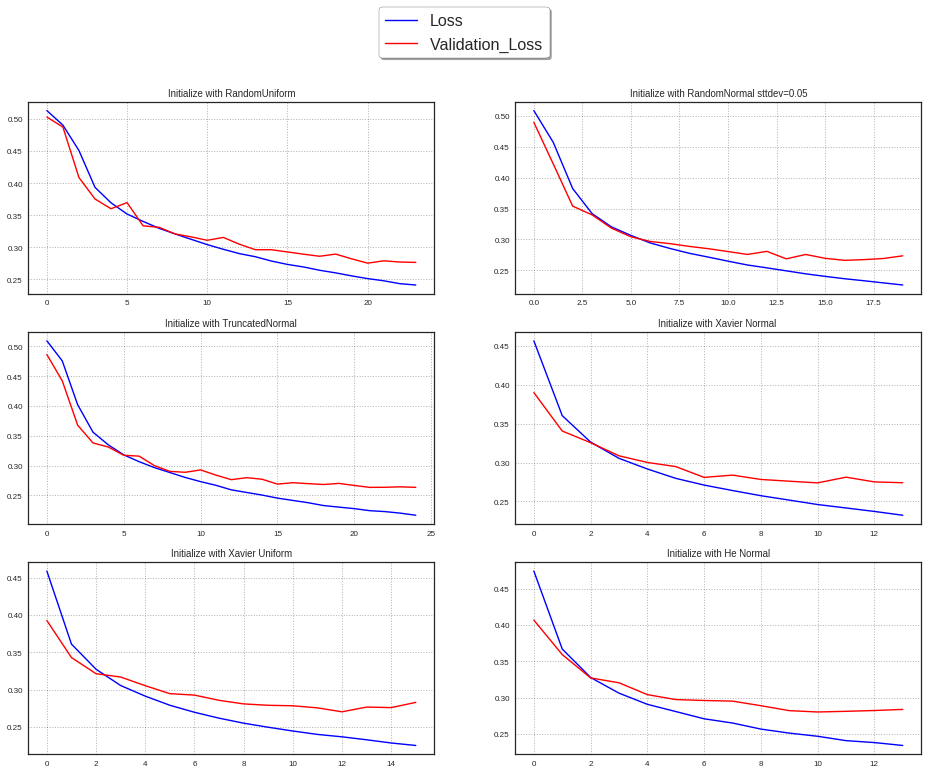

In [142]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(16,12))
ax1.plot(model_1_history.history['loss'],color='b')
ax1.plot(model_1_history.history['val_loss'],color='r')
ax1.set_title('Initialize with RandomUniform')
ax1.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax2.plot(model_2_history.history['loss'],color='b')
ax2.plot(model_2_history.history['val_loss'],color='r')
ax2.set_title('Initialize with RandomNormal sttdev=0.05')
ax2.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax3.plot(model_3_history.history['loss'],color='b')
ax3.plot(model_3_history.history['val_loss'],color='r')
ax3.set_title('Initialize with TruncatedNormal')
ax3.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax4.plot(model_4_history.history['loss'],color='b')
ax4.plot(model_4_history.history['val_loss'],color='r')
ax4.set_title('Initialize with Xavier Normal ')
ax4.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax5.plot(model_5_history.history['loss'],color='b')
ax5.plot(model_5_history.history['val_loss'],color='r')
ax5.set_title('Initialize with Xavier Uniform')
ax5.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

ax6.plot(model_6_history.history['loss'],color='b',label='Loss')
ax6.plot(model_6_history.history['val_loss'],color='r',label='Validation_Loss')
ax6.set_title('Initialize with He Normal')
ax6.grid(True, color='black',linestyle='dotted',linewidth=1,alpha=0.3)

handles, labels = ax6.get_legend_handles_labels()
fig.legend(handles, labels,loc='upper center',ncol=1,fontsize=16,frameon=True,edgecolor='black',shadow=True)